:## Análise de Séries Temporais - Taxi de NY

Neste estudo, vamos verificar através de uma série temporal, a previsão de passeios de taxi de Nova Iorque, este algoritmo visa prever a detecção de anomalias em casos de feriados e eventos na cidade, prevendo o quanto as pessoas irão utilizar os veículos nos próximos meses.

In [31]:
import pandas as pd

data = pd.read_csv('/content/dataset.csv', index_col=0)

data.head()


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 499.9+ KB


In [33]:
#Convertendo para um objeto de data
data['timestamp'] = pd.to_datetime(data['timestamp'])

#Inserindo um indice para a data no dataframe
data = data.set_index('timestamp')

data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [34]:
#Verificação de null
data.isna().sum()

,0
value,0


<h2> Visualização de dados </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

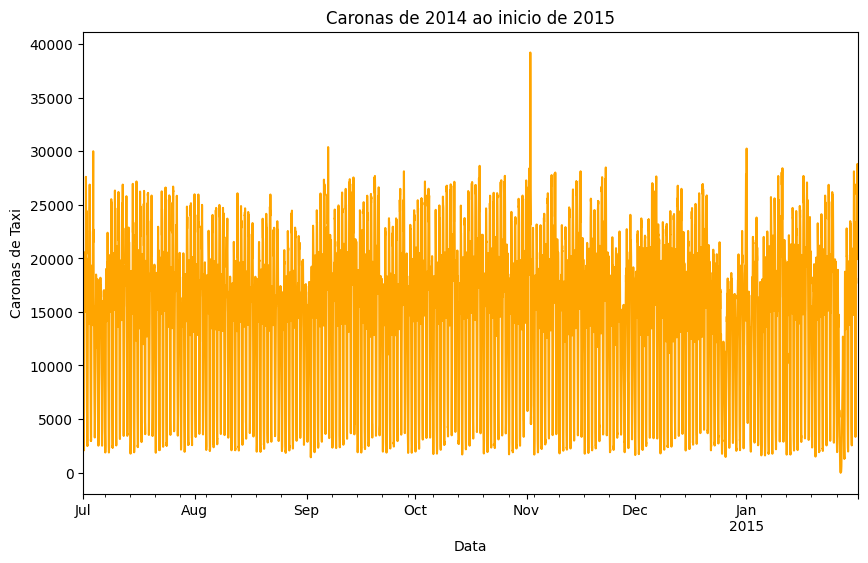

In [35]:
import numpy as np
import matplotlib.pyplot as plt

data['value'].plot(figsize=(10, 6), color='orange')
plt.title('Caronas de 2014 ao inicio de 2015')
plt.xlabel('Data')
plt.ylabel('Caronas de Taxi')
plt.show

## Modelo

O modelo será feito por Long Short-Term Memory (LSTM), pois este tipo de rede neural é eficaz para séries temporais, cujoas sequências de dados têm dependência temporal.

In [36]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

values = data['value'].values

escalador = MinMaxScaler(feature_range=(0, 1))
vl_escalados = escalador.fit_transform(values.reshape(-1,1))

# Hora de treinar
tam_treino = int(len(vl_escalados) * 0.8)
dados_treino = vl_escalados[:tam_treino]
dados_teste = vl_escalados[tam_treino:]

In [37]:
def create_sequences(data, tam_sequencia):
    X, y = [], []
    for i in range(len(data) - tam_sequencia):
        X.append(data[i:i+tam_sequencia])
        y.append(data[i+tam_sequencia])
    return np.array(X), np.array(y)

In [38]:
tam_sequencia = 10
X_train, y_train = create_sequences(dados_treino, tam_sequencia)
X_test, y_test = create_sequences(dados_teste, tam_sequencia)

X_train.shape

(8246, 10, 1)

In [39]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(tam_sequencia, 1))) #64 = 64 Neurônios, relu = Rectified Linear Unit
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse') #adam ajusta a taxa de aprendizado automaticamente / o MSE penaliza diferenças grandes entre valor previsto e valor real

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Calculo do modelo no conjunto de teste
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# fazer predições
predictions = model.predict(X_test)

# Inversão das predições em valores reais
predicted_values = escalador.inverse_transform(predictions)
actual_values = escalador.inverse_transform(y_test)

Epoch 1/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0399
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0039
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0032
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021
Epoch 6/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011
Epoch 8/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 9/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.5846e-04
Epoch 10/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 9.1142e-04
Epoch 11/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.8454e-04
Epoch 12/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.5327e-04
Epoch 13/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.6077e-04
Epoch 14/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.0839e-04
Epoch 15/30
258/258 ━━━━━━━━━━━━━

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


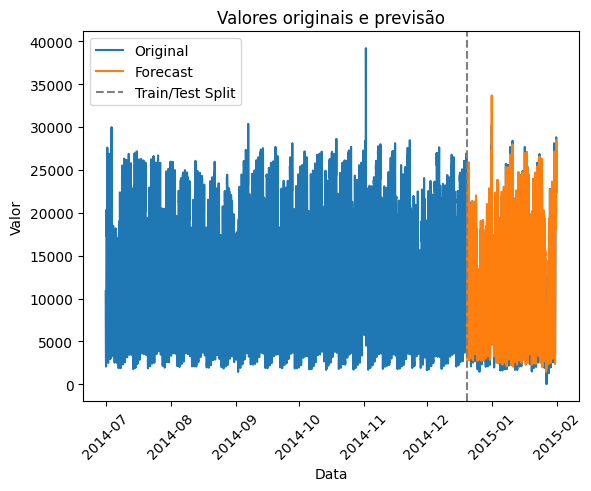

In [41]:
# Plotting the original values
plt.plot(data, label='Original')

# Plotting the forecasted values

predictions = model.predict(X_train)

plt.plot(data.index[-len(predicted_values):], predicted_values, label='Forecast')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores originais e previsão')
plt.axvline(data.index[-len(predicted_values)], color='grey', linestyle='--', label='Train/Test Split')
plt.legend()
plt.xticks(rotation=45)
plt.show()